In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import numpy as np

In [16]:
from transit_periodogram import transit_periodogram

In [17]:
from astropy.io import fits as pyfits

In [18]:
f = pyfits.open("https://archive.stsci.edu/hlsps/everest/v2/c12/246100000/99087/"
                "hlsp_everest_k2_llc_246199087-c12_kepler_v2.0_lc.fits")

In [19]:
flux = f[1].data['flux']
time = f[1].data['time']
mask = np.isfinite(flux)
time = time[mask]
flux = flux[mask]

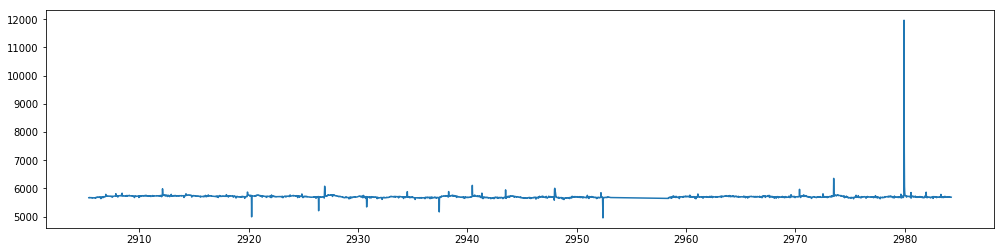

In [20]:
plt.figure(figsize=[17, 4])
plt.plot(time, flux)

In [21]:
from lightkurve import LightCurve

In [22]:
lc = LightCurve(time=time, flux=flux)

In [24]:
lc = lc.remove_outliers() # remove_flares

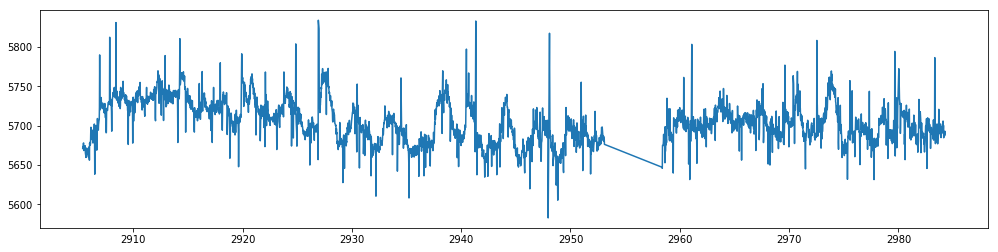

In [25]:
plt.figure(figsize=[17, 4])
plt.plot(lc.time, lc.flux)

In [26]:
flat, trend = lc.flatten(return_trend=True, window_length=101)

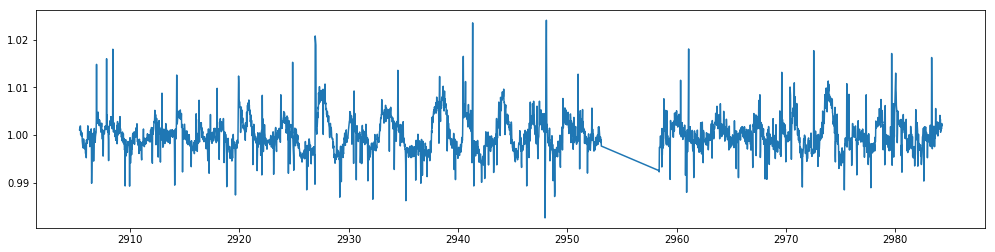

In [190]:
plt.figure(figsize=[17, 4])
plt.plot(lc.)
plt.plot(trend.time, trend.flux)

In [196]:
flat, trend = flat_.flatten(return_trend=True, window_length=101)

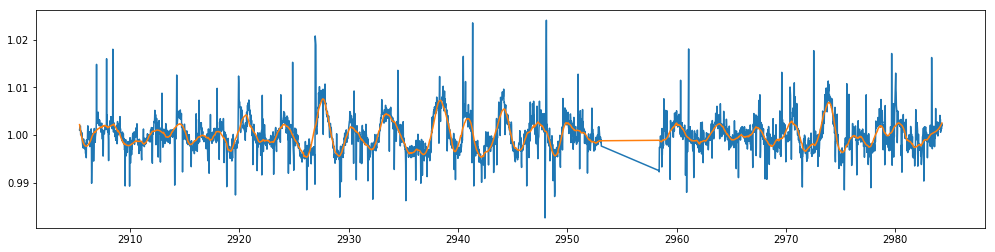

In [198]:
plt.figure(figsize=[17, 4])
plt.plot(flat_.time, flat_.flux)
plt.plot(trend.time, trend.flux)

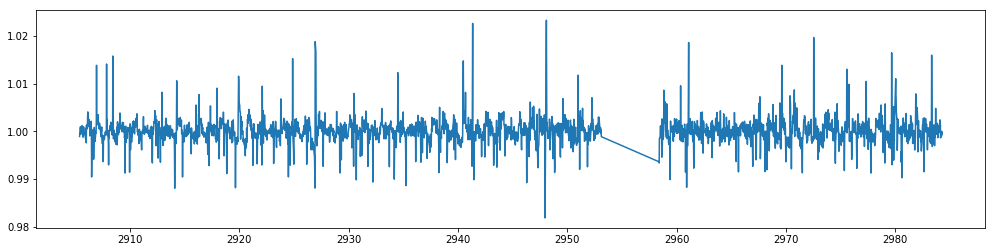

In [199]:
plt.figure(figsize=[17, 4])
plt.plot(flat.time, flat.flux)

In [200]:
trial_periods = np.logspace(np.log10(.5), np.log10(20.), 20000)
durations = np.logspace(np.log10(.01), np.log10(.4), 200)

In [201]:
periods, obj, _, _, _, _, phase, duration = transit_periodogram(flat.time, flat.flux, trial_periods,
                                                                durations, method='likelihood')

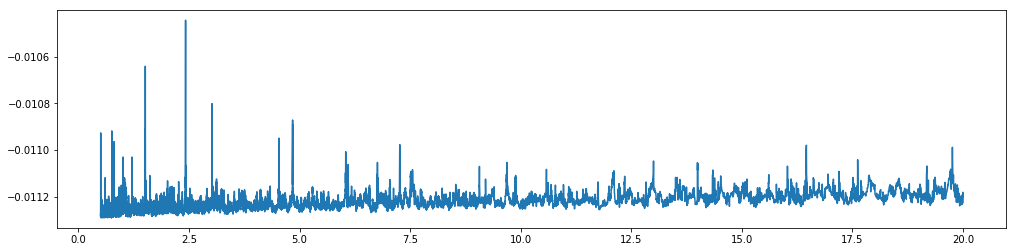

In [202]:
plt.figure(figsize=[17, 4])
plt.plot(periods, obj)

In [203]:
periods[np.argmax(obj)]

2.4221739239255031

In [213]:
duration[np.argmax(obj)]

0.040000000000000001

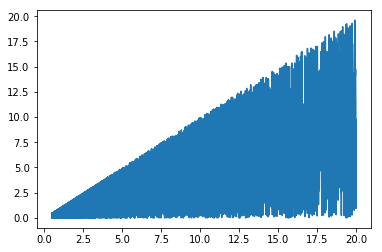

In [212]:
plt.plot(periods, phase)

In [208]:
folded = flat.fold(period=periods[np.argmax(obj)], phase=phase[np.argmax(obj)])

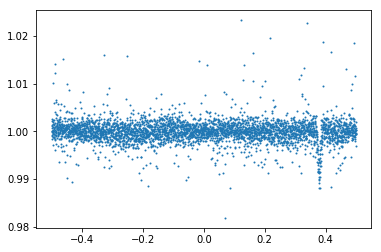

In [209]:
plt.plot(folded.time, folded.flux, 'o', markersize=1)